In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sqlalchemy import create_engine
import warnings

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"
table_name = "houseprices"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from {}".format(table_name), con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [4]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [5]:
df.shape

(1460, 81)

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

<IPython.core.display.Javascript object>

In [7]:
df.isna().mean().sort_values(ascending=False).head(20)

poolqc          0.995205
miscfeature     0.963014
alley           0.937671
fence           0.807534
fireplacequ     0.472603
lotfrontage     0.177397
garagecond      0.055479
garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagequal      0.055479
bsmtexposure    0.026027
bsmtfintype2    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrarea      0.005479
masvnrtype      0.005479
electrical      0.000685
utilities       0.000000
dtype: float64

<IPython.core.display.Javascript object>

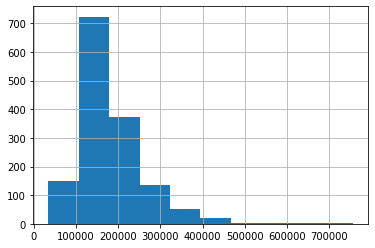

<IPython.core.display.Javascript object>

In [8]:
df["saleprice"].hist()

In [15]:
df["miscfeature"].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: miscfeature, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
df["poolqc"].value_counts()

Gd    3
Ex    2
Fa    2
Name: poolqc, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
df["alley"].value_counts()

Grvl    50
Pave    41
Name: alley, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
df["fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: fence, dtype: int64

<IPython.core.display.Javascript object>

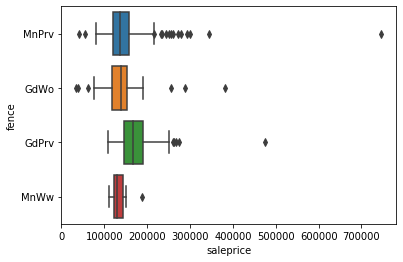

<IPython.core.display.Javascript object>

In [23]:
sns.boxplot(x="saleprice", y="fence", data=df)

In [24]:
df[df["fence"].isna()]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,20,RL,90.0,17217,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,None,None,None,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


<IPython.core.display.Javascript object>

There doesn't seem to be any way to really interpolate or otherwise substitute these values. Doing so would create unreliable data. I have no problem dropping them.

In [25]:
df = df.drop(columns=["poolqc", "miscfeature", "alley", "fence"])

<IPython.core.display.Javascript object>

In [26]:
df.isna().mean().sort_values(ascending=False).head(20)

fireplacequ     0.472603
lotfrontage     0.177397
garageyrblt     0.055479
garagetype      0.055479
garagefinish    0.055479
garagequal      0.055479
garagecond      0.055479
bsmtexposure    0.026027
bsmtfintype2    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrtype      0.005479
masvnrarea      0.005479
electrical      0.000685
roofmatl        0.000000
roofstyle       0.000000
saleprice       0.000000
exterior1st     0.000000
exterior2nd     0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [29]:
df[df["fireplacequ"].isna()]["fireplaces"].value_counts()

0    690
Name: fireplaces, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
df["fireplaces"].value_counts()

0    690
1    650
2    115
3      5
Name: fireplaces, dtype: int64

<IPython.core.display.Javascript object>

Seems like all instances where there are 0 fireplaces, there is a NaN stored for the fireplace quality. Could be considered redundant information.

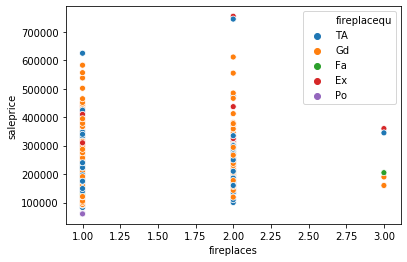

<IPython.core.display.Javascript object>

In [34]:
sns.scatterplot(x="fireplaces", y="saleprice", hue="fireplacequ", data=df)

There doesn't seem to be much of a trend in these relationships. Also, things like quality and amount of fireplaces are probably able to be explained by square footage and overall quality of the home. For now, I don't mind replacing the NaN's with a 'None' string. There's a good chance I'll drop both of these completely later on.

In [40]:
df["fireplacequ"] = df["fireplacequ"].fillna("None")

<IPython.core.display.Javascript object>

In [41]:
df["fireplacequ"].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: fireplacequ, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
df.isna().mean().sort_values(ascending=False).head(20)

lotfrontage     0.177397
garagefinish    0.055479
garagetype      0.055479
garagecond      0.055479
garagequal      0.055479
garageyrblt     0.055479
bsmtexposure    0.026027
bsmtfintype2    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrtype      0.005479
masvnrarea      0.005479
electrical      0.000685
roofstyle       0.000000
roofmatl        0.000000
saleprice       0.000000
exterior1st     0.000000
exterior2nd     0.000000
yearbuilt       0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [43]:
df["lotfrontage"].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: lotfrontage, dtype: float64

<IPython.core.display.Javascript object>

In [44]:
df["lotfrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: lotfrontage, dtype: float64

<IPython.core.display.Javascript object>

In [45]:
df.corr()["lotfrontage"] #strongest logical correlation is lot are. would like to see scatter

id              -0.010601
mssubclass      -0.386347
lotfrontage      1.000000
lotarea          0.426095
overallqual      0.251646
overallcond     -0.059213
yearbuilt        0.123349
yearremodadd     0.088866
masvnrarea       0.193458
bsmtfinsf1       0.233633
bsmtfinsf2       0.049900
bsmtunfsf        0.132644
totalbsmtsf      0.392075
firstflrsf       0.457181
secondflrsf      0.080177
lowqualfinsf     0.038469
grlivarea        0.402797
bsmtfullbath     0.100949
bsmthalfbath    -0.007234
fullbath         0.198769
halfbath         0.053532
bedroomabvgr     0.263170
kitchenabvgr    -0.006069
totrmsabvgrd     0.352096
fireplaces       0.266639
garageyrblt      0.070250
garagecars       0.285691
garagearea       0.344997
wooddecksf       0.088521
openporchsf      0.151972
enclosedporch    0.010700
threessnporch    0.070029
screenporch      0.041383
poolarea         0.206167
miscval          0.003368
mosold           0.011200
yrsold           0.007450
saleprice        0.351799
Name: lotfro

<IPython.core.display.Javascript object>

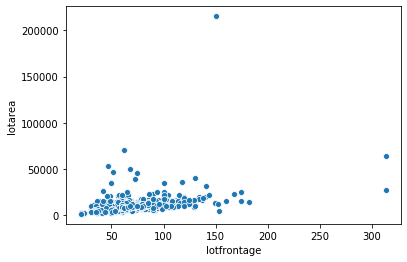

<IPython.core.display.Javascript object>

In [46]:
sns.scatterplot("lotfrontage", "lotarea", data=df) #probably not the best to interpolate off of

In [54]:
df[df["lotfrontage"].isna()]["paveddrive"].value_counts()

Y    245
N      9
P      5
Name: paveddrive, dtype: int64

<IPython.core.display.Javascript object>

In [55]:
df["paveddrive"].value_counts()

Y    1340
N      90
P      30
Name: paveddrive, dtype: int64

<IPython.core.display.Javascript object>

Can't seem to find any rhyme or reason to the missing values. I think median imputation is probably an ok fix here.

In [56]:
df["lotfrontage"] = df["lotfrontage"].fillna(df["lotfrontage"].median())

<IPython.core.display.Javascript object>

In [57]:
df.isna().mean().sort_values(ascending=False).head(20)

garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagecond      0.055479
garagequal      0.055479
bsmtexposure    0.026027
bsmtfintype2    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrtype      0.005479
masvnrarea      0.005479
electrical      0.000685
roofmatl        0.000000
roofstyle       0.000000
saleprice       0.000000
exterior1st     0.000000
exterior2nd     0.000000
yearbuilt       0.000000
exterqual       0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [60]:
df["garagecars"].value_counts() / df.shape[0]
#looks like all the nas are encapsulated in the entries where garagecars == 0
#putting in a 'none' class seems like adding redundant information.
#there seems to be a lot of overlap in general for information contained in the garage columns

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: garagecars, dtype: float64

<IPython.core.display.Javascript object>

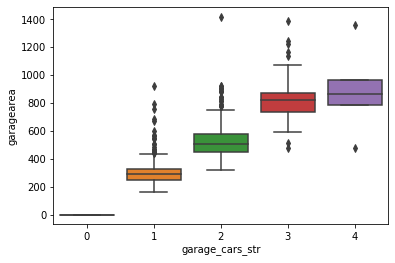

<IPython.core.display.Javascript object>

In [70]:
df["garage_cars_str"] = df["garagecars"].astype(str)
sns.boxplot(x="garage_cars_str", y="garagearea", data=df)

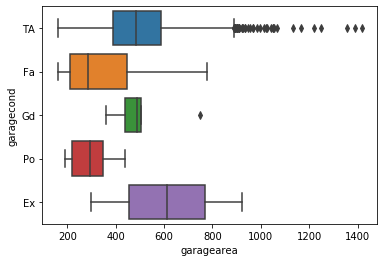

<IPython.core.display.Javascript object>

In [67]:
sns.boxplot(x="garagearea", y="garagecond", data=df)

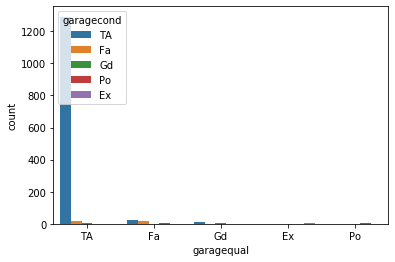

<IPython.core.display.Javascript object>

In [73]:
sns.countplot(x="garagequal", hue="garagecond", data=df)

In [74]:
df["garagetype"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: garagetype, dtype: int64

<IPython.core.display.Javascript object>

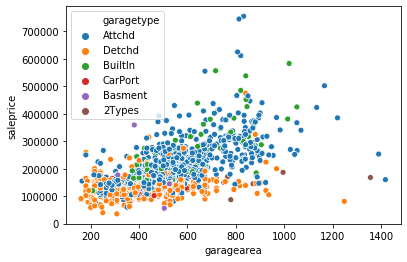

<IPython.core.display.Javascript object>

In [75]:
sns.scatterplot(x="garagearea", y="saleprice", hue="garagetype", data=df)

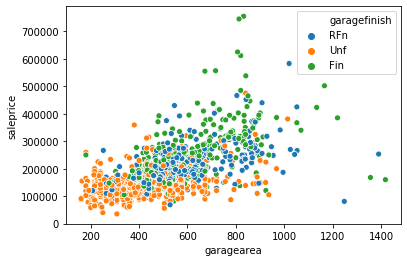

<IPython.core.display.Javascript object>

In [78]:
sns.scatterplot(x="garagearea", y="saleprice", hue="garagefinish", data=df)

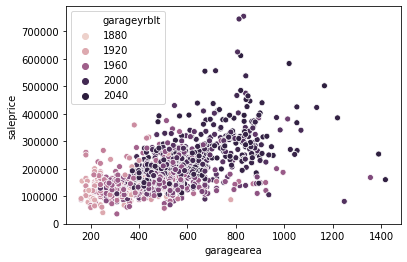

<IPython.core.display.Javascript object>

In [80]:
sns.scatterplot(x="garagearea", y="saleprice", hue="garageyrblt", data=df)

The only factors that seem to have any relevancy to saleprice is area, type, finish, and yearbuilt. Yearbuilt I think should be handled with a low impact central tendency imputation. Area could be set to 0. And for categoricals, just set them to 'none'. Every other feature can either be explained from either or has low impact on saleprice

In [86]:
df = df.drop(columns=["garagecars", "garagequal", "garagecond"])

<IPython.core.display.Javascript object>

In [82]:
df["garageyrblt"] = df["garageyrblt"].fillna(df["garageyrblt"].median())
df["garagefinish"] = df["garagefinish"].fillna("None")
df["garagetype"] = df["garagetype"].fillna("None")

<IPython.core.display.Javascript object>

In [88]:
df.isna().mean().sort_values(ascending=False).head(10)

bsmtfintype2       0.026027
bsmtexposure       0.026027
bsmtfintype1       0.025342
bsmtcond           0.025342
bsmtqual           0.025342
masvnrtype         0.005479
masvnrarea         0.005479
electrical         0.000685
garage_cars_str    0.000000
roofstyle          0.000000
dtype: float64

<IPython.core.display.Javascript object>

NaNs seem to be covered where basement square footage is zero. I think adding a none class works here.

In [91]:
df[df["bsmtfintype2"].isna()]["totalbsmtsf"]

17         0
39         0
90         0
100        0
103        0
157        0
183        0
260        0
333     3206
343        0
363        0
372        0
393        0
532        0
533        0
553        0
646        0
705        0
736        0
749        0
778        0
868        0
894        0
897        0
984        0
1000       0
1011       0
1035       0
1045       0
1048       0
1049       0
1090       0
1179       0
1216       0
1218       0
1233       0
1321       0
1412       0
Name: totalbsmtsf, dtype: int64

<IPython.core.display.Javascript object>

In [92]:
df["bsmtfintype2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: bsmtfintype2, dtype: int64

<IPython.core.display.Javascript object>

In [95]:
df["bsmtexposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: bsmtexposure, dtype: int64

<IPython.core.display.Javascript object>

In [96]:
bsmt_cols = ["bsmtfintype2", "bsmtexposure", "bsmtfintype1", "bsmtcond", "bsmtqual"]
for col in bsmt_cols:
    df[col] = df[col].fillna("None")

<IPython.core.display.Javascript object>

In [97]:
df.isna().mean().sort_values(ascending=False).head(10)

masvnrtype         0.005479
masvnrarea         0.005479
electrical         0.000685
garage_cars_str    0.000000
extercond          0.000000
roofstyle          0.000000
roofmatl           0.000000
exterior1st        0.000000
exterior2nd        0.000000
exterqual          0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [98]:
df["masvnrtype"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: masvnrtype, dtype: int64

<IPython.core.display.Javascript object>

In [100]:
df[df["masvnrtype"].isna()] #I can't see any pattern as to why these values are missing. 
#The vast majority are set to none. I think we can fill with those

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage_cars_str
235,235,60,RL,69.0,7851,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,5,2010,WD,Normal,216500,2
529,530,20,RL,69.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,3,2007,WD,Alloca,200624,2
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,5,2008,WD,Normal,205950,2
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2009,WD,Normal,184900,2
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,12,2008,New,Partial,182000,2
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,11,2007,New,Partial,199900,2
1244,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,9,2006,New,Partial,465000,3
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,3,2008,WD,Normal,237000,2


<IPython.core.display.Javascript object>

In [101]:
df[df["masvnrarea"].isna()]["masvnrtype"]

235     None
529     None
650     None
936     None
973     None
977     None
1244    None
1278    None
Name: masvnrtype, dtype: object

<IPython.core.display.Javascript object>

In [105]:
df[df["masvnrtype"] == "None"]["masvnrarea"].value_counts()

0.0      859
1.0        2
312.0      1
344.0      1
288.0      1
Name: masvnrarea, dtype: int64

<IPython.core.display.Javascript object>

In [104]:
df["masvnrarea"] = df["masvnrarea"].fillna(0.0)

<IPython.core.display.Javascript object>

In [106]:
df["masvnrtype"] = df["masvnrtype"].fillna("None")

<IPython.core.display.Javascript object>

In [107]:
df.isna().mean().sort_values(ascending=False).head(10)

electrical         0.000685
garage_cars_str    0.000000
extercond          0.000000
roofstyle          0.000000
roofmatl           0.000000
exterior1st        0.000000
exterior2nd        0.000000
masvnrtype         0.000000
masvnrarea         0.000000
exterqual          0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [108]:
df["electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: electrical, dtype: int64

<IPython.core.display.Javascript object>

In [109]:
df[df["electrical"].isna()] #1 entry? dropping it

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice,garage_cars_str
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,5,2008,WD,Normal,167500,2


<IPython.core.display.Javascript object>

In [122]:
df = df.dropna()
df = df.drop(columns="garage_cars_str")

<IPython.core.display.Javascript object>

In [111]:
df.isna().mean().sort_values(ascending=False).head(10)

garage_cars_str    0.0
yearbuilt          0.0
roofstyle          0.0
roofmatl           0.0
exterior1st        0.0
exterior2nd        0.0
masvnrtype         0.0
masvnrarea         0.0
exterqual          0.0
extercond          0.0
dtype: float64

<IPython.core.display.Javascript object>

In [112]:
df.shape

(1459, 75)

<IPython.core.display.Javascript object>

In [113]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagearea', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosedporch

<IPython.core.display.Javascript object>

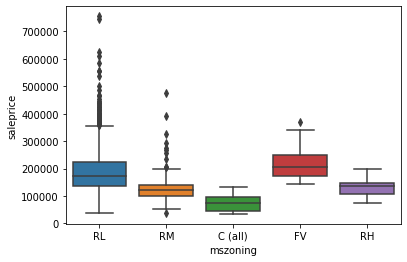

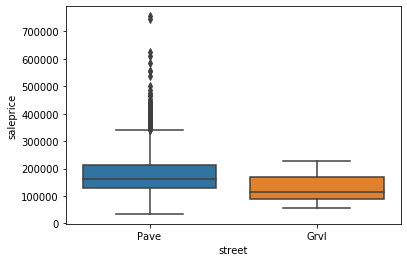

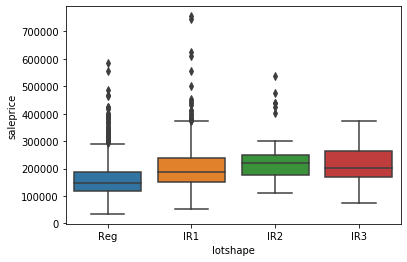

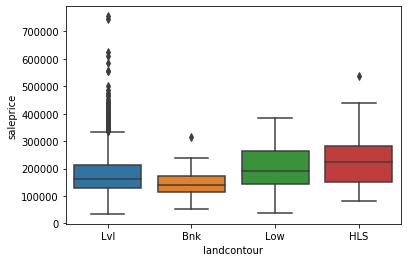

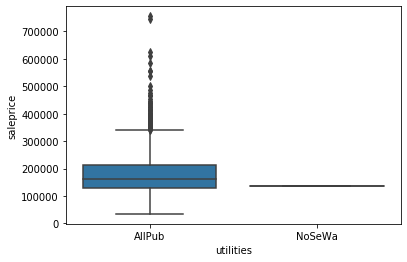

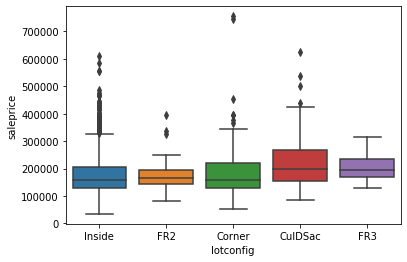

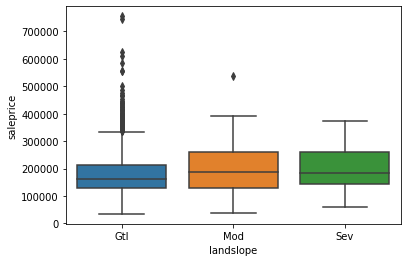

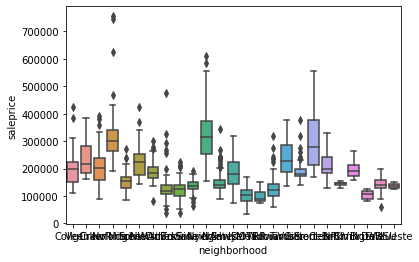

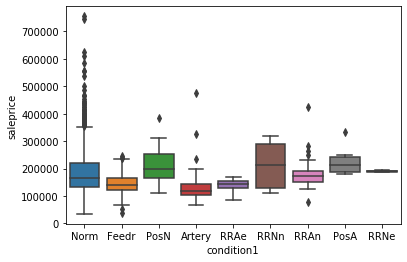

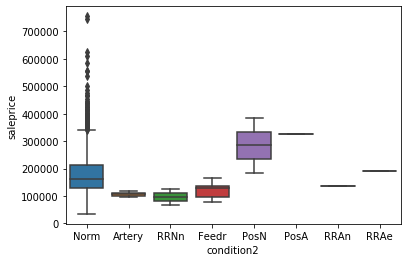

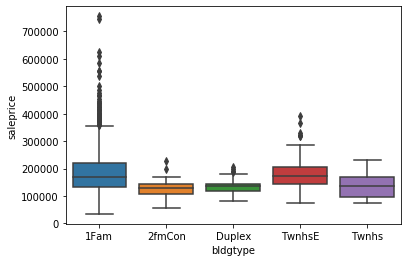

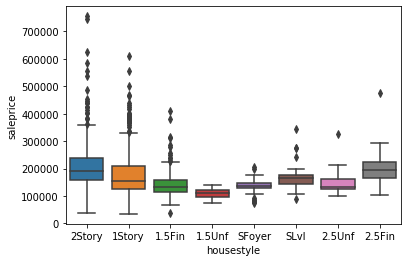

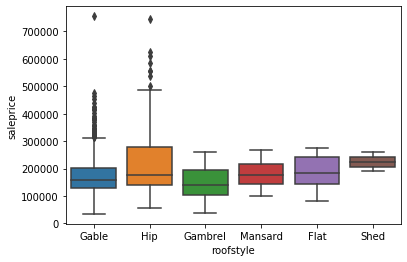

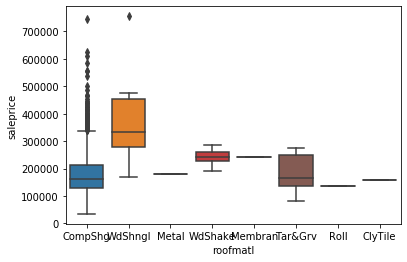

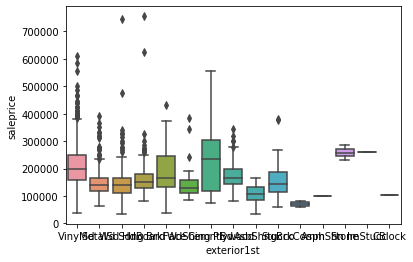

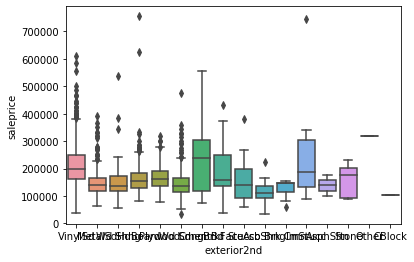

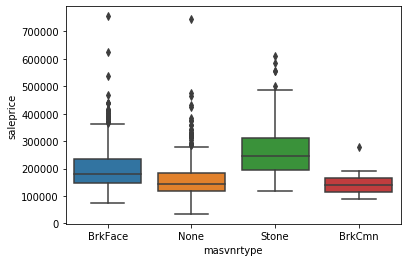

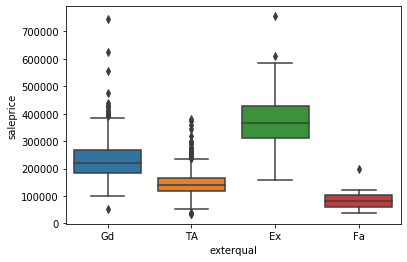

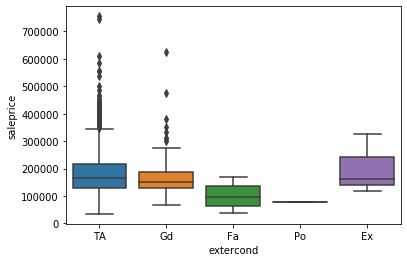

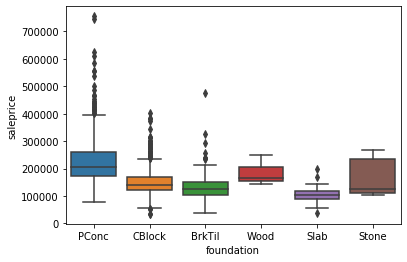

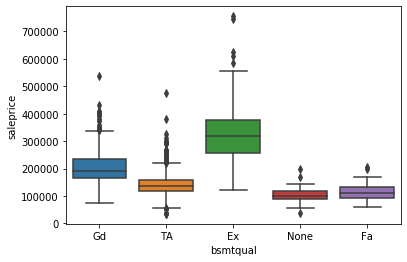

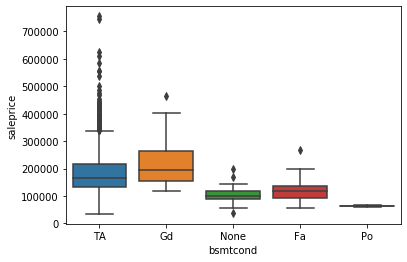

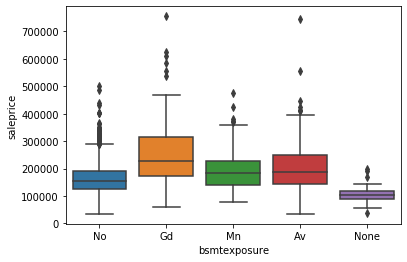

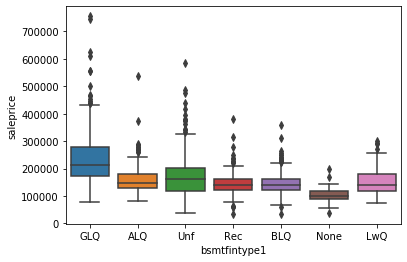

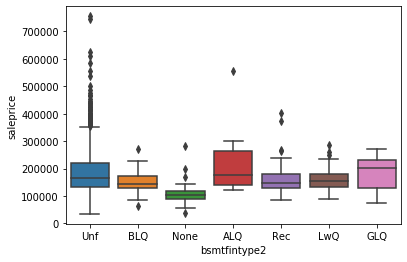

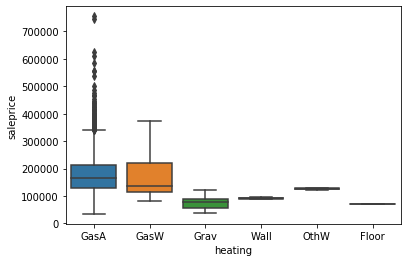

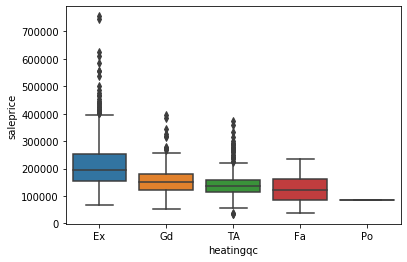

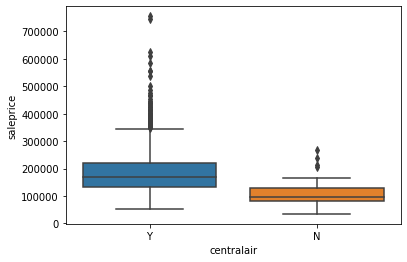

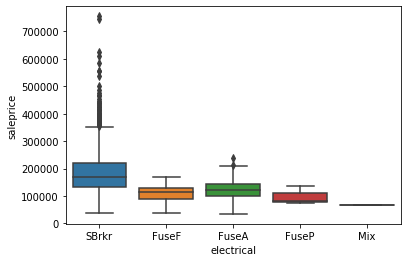

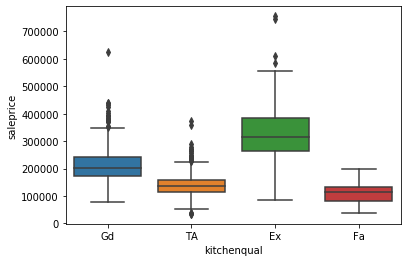

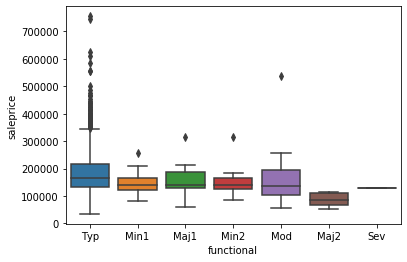

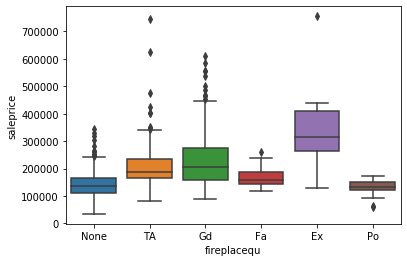

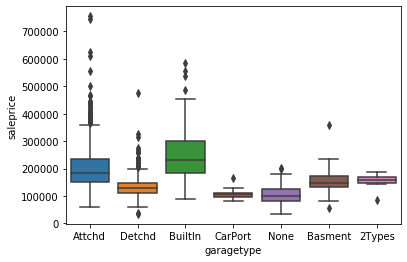

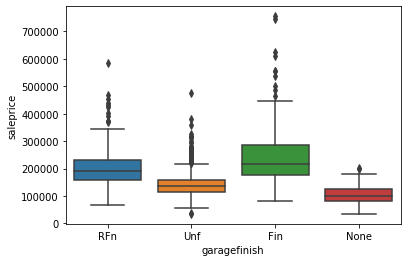

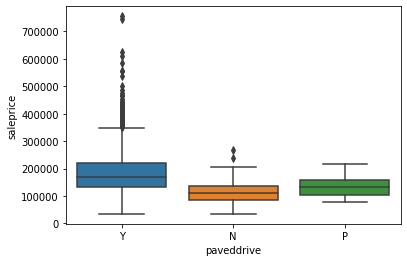

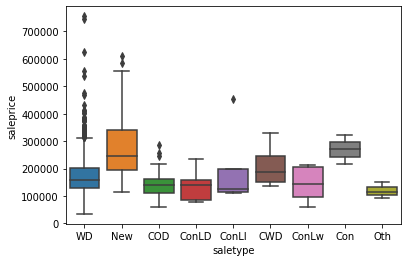

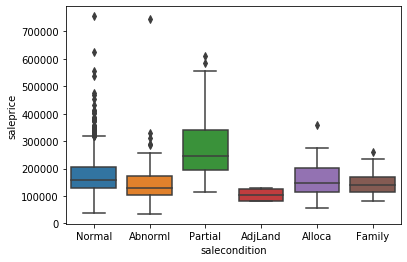

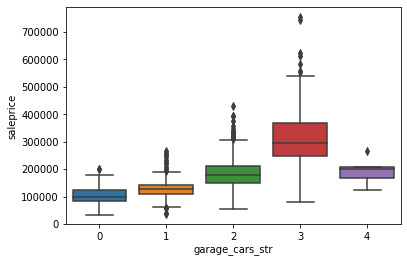

<IPython.core.display.Javascript object>

In [121]:
for col in df.columns:
    if df[col].dtype == "object":
        sns.boxplot(x=col, y="saleprice", data=df)
        plt.show()

#utilities, lot config don't seem useful

In [123]:
df = df.drop(columns=["lotconfig", "utilities"])

<IPython.core.display.Javascript object>

                 id  saleprice
id         1.000000  -0.021756
saleprice -0.021756   1.000000


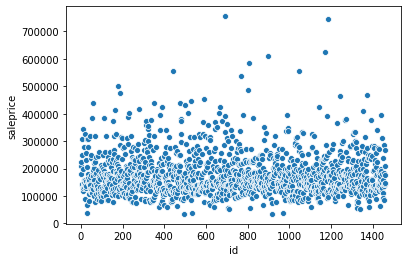

            mssubclass  saleprice
mssubclass     1.00000   -0.08423
saleprice     -0.08423    1.00000


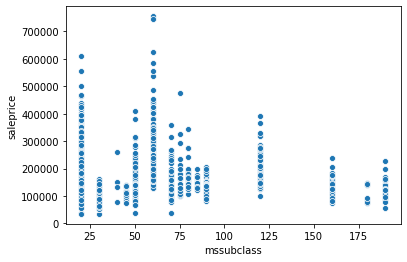

             lotfrontage  saleprice
lotfrontage     1.000000   0.334793
saleprice       0.334793   1.000000


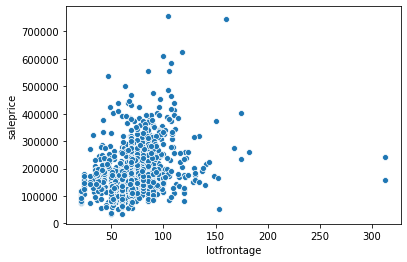

            lotarea  saleprice
lotarea    1.000000   0.263837
saleprice  0.263837   1.000000


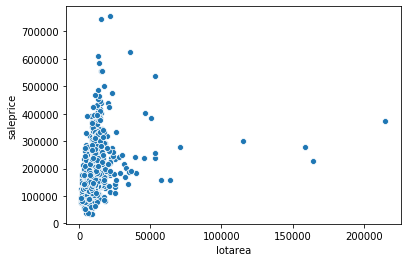

             overallqual  saleprice
overallqual     1.000000   0.791069
saleprice       0.791069   1.000000


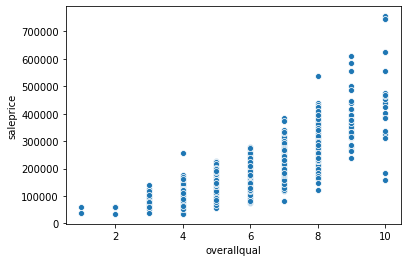

             overallcond  saleprice
overallcond     1.000000  -0.077924
saleprice      -0.077924   1.000000


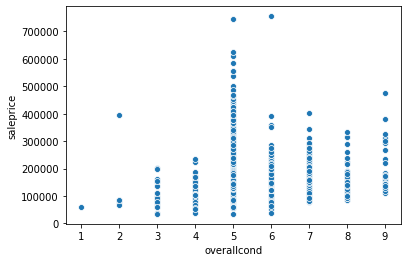

           yearbuilt  saleprice
yearbuilt   1.000000   0.523273
saleprice   0.523273   1.000000


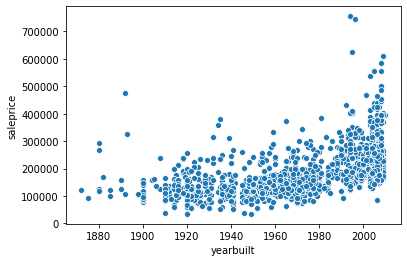

              yearremodadd  saleprice
yearremodadd       1.00000    0.50743
saleprice          0.50743    1.00000


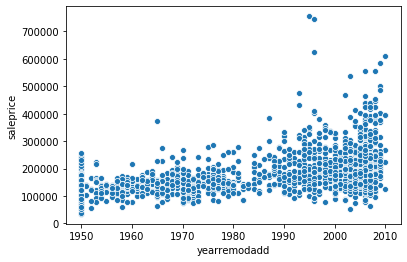

            masvnrarea  saleprice
masvnrarea    1.000000   0.472606
saleprice     0.472606   1.000000


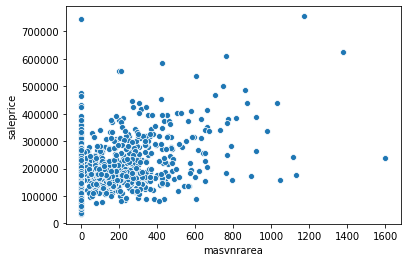

            bsmtfinsf1  saleprice
bsmtfinsf1    1.000000   0.386436
saleprice     0.386436   1.000000


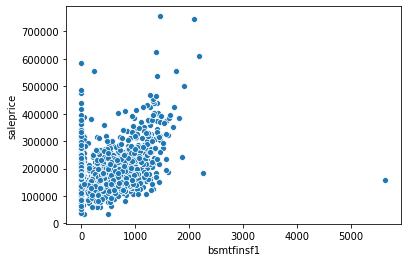

            bsmtfinsf2  saleprice
bsmtfinsf2    1.000000  -0.011412
saleprice    -0.011412   1.000000


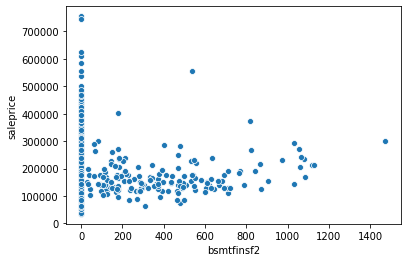

           bsmtunfsf  saleprice
bsmtunfsf   1.000000   0.214446
saleprice   0.214446   1.000000


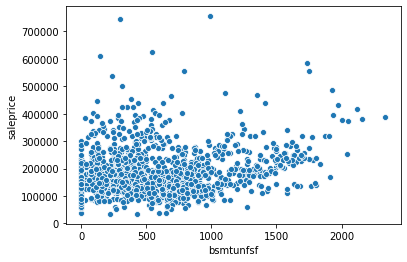

             totalbsmtsf  saleprice
totalbsmtsf     1.000000   0.613905
saleprice       0.613905   1.000000


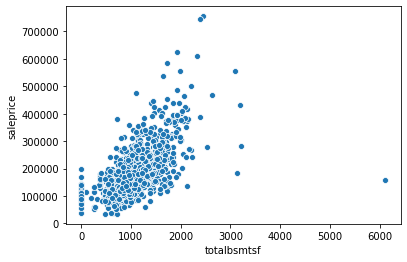

            firstflrsf  saleprice
firstflrsf    1.000000   0.605968
saleprice     0.605968   1.000000


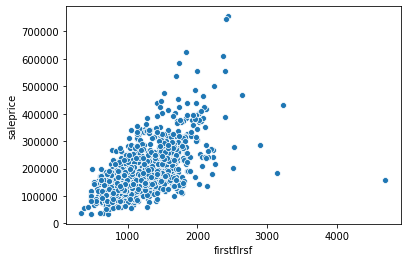

             secondflrsf  saleprice
secondflrsf     1.000000   0.319464
saleprice       0.319464   1.000000


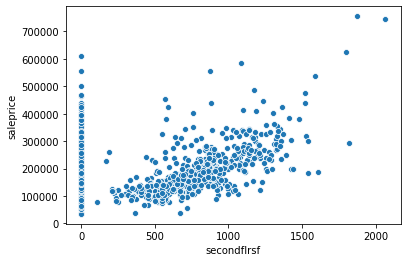

              lowqualfinsf  saleprice
lowqualfinsf       1.00000   -0.02562
saleprice         -0.02562    1.00000


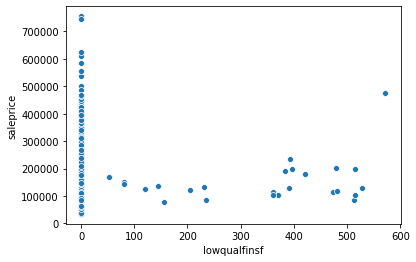

           grlivarea  saleprice
grlivarea   1.000000   0.708618
saleprice   0.708618   1.000000


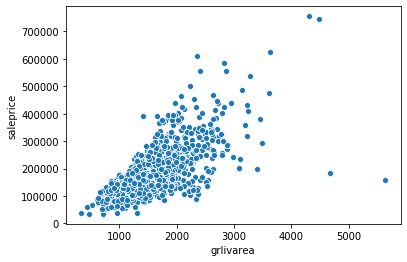

              bsmtfullbath  saleprice
bsmtfullbath      1.000000   0.227082
saleprice         0.227082   1.000000


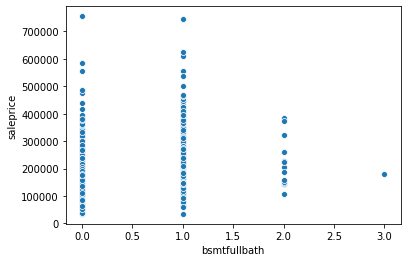

              bsmthalfbath  saleprice
bsmthalfbath      1.000000  -0.016873
saleprice        -0.016873   1.000000


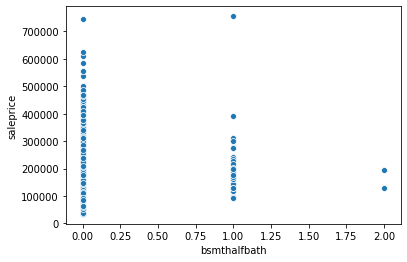

           fullbath  saleprice
fullbath   1.000000   0.560881
saleprice  0.560881   1.000000


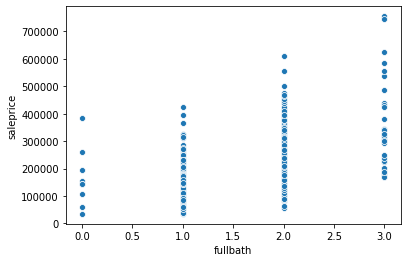

           halfbath  saleprice
halfbath     1.0000     0.2844
saleprice    0.2844     1.0000


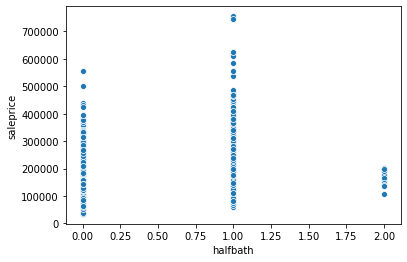

              bedroomabvgr  saleprice
bedroomabvgr      1.000000   0.168235
saleprice         0.168235   1.000000


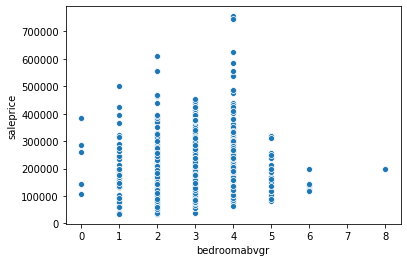

              kitchenabvgr  saleprice
kitchenabvgr      1.000000  -0.135935
saleprice        -0.135935   1.000000


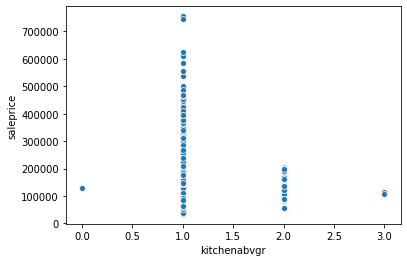

              totrmsabvgrd  saleprice
totrmsabvgrd      1.000000   0.533779
saleprice         0.533779   1.000000


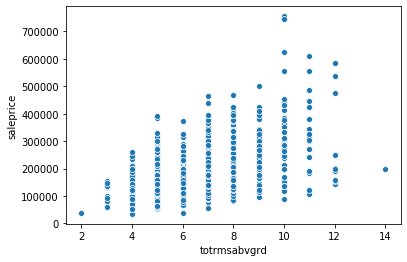

            fireplaces  saleprice
fireplaces    1.000000   0.466968
saleprice     0.466968   1.000000


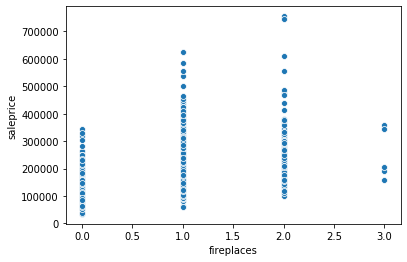

             garageyrblt  saleprice
garageyrblt      1.00000    0.46712
saleprice        0.46712    1.00000


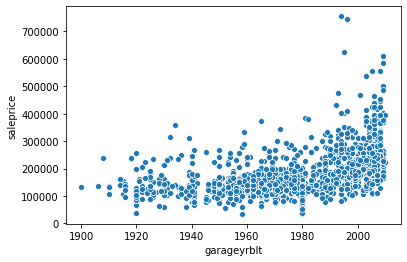

            garagearea  saleprice
garagearea    1.000000   0.623423
saleprice     0.623423   1.000000


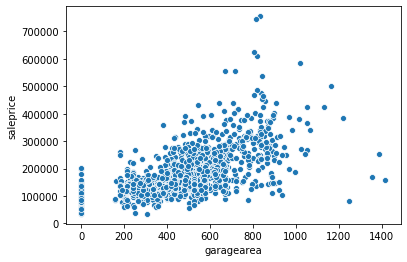

            wooddecksf  saleprice
wooddecksf    1.000000   0.324422
saleprice     0.324422   1.000000


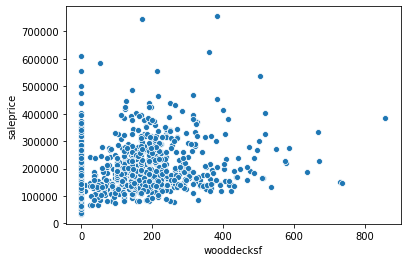

             openporchsf  saleprice
openporchsf     1.000000   0.315831
saleprice       0.315831   1.000000


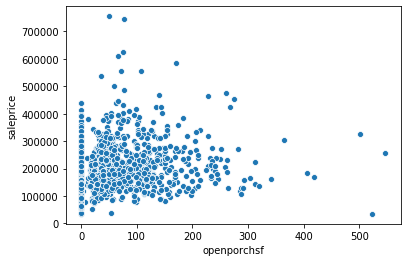

               enclosedporch  saleprice
enclosedporch       1.000000  -0.128627
saleprice          -0.128627   1.000000


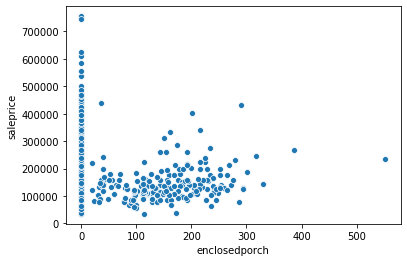

               threessnporch  saleprice
threessnporch       1.000000   0.044571
saleprice           0.044571   1.000000


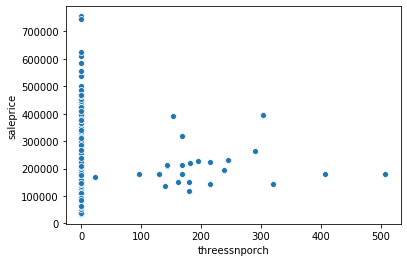

             screenporch  saleprice
screenporch     1.000000   0.111419
saleprice       0.111419   1.000000


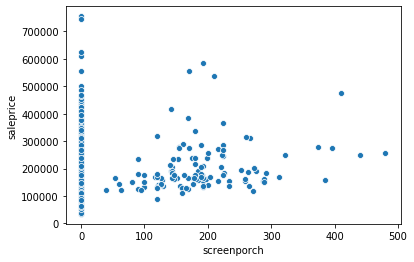

           poolarea  saleprice
poolarea   1.000000   0.092397
saleprice  0.092397   1.000000


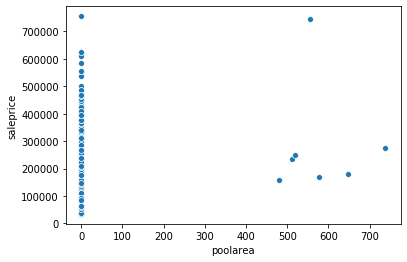

           miscval  saleprice
miscval     1.0000    -0.0212
saleprice  -0.0212     1.0000


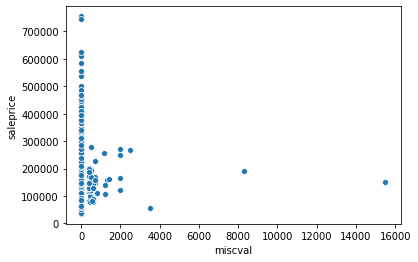

            mosold  saleprice
mosold     1.00000    0.04638
saleprice  0.04638    1.00000


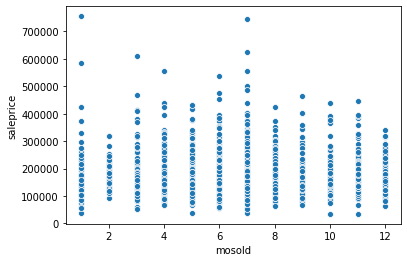

             yrsold  saleprice
yrsold     1.000000  -0.028907
saleprice -0.028907   1.000000


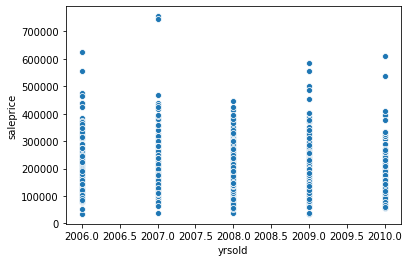

           saleprice  saleprice
saleprice        1.0        1.0
saleprice        1.0        1.0


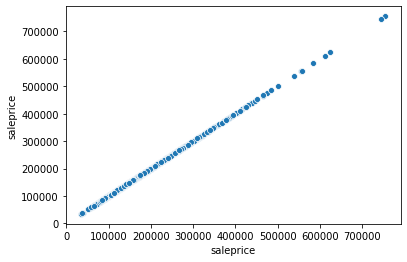

<IPython.core.display.Javascript object>

In [129]:
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        sns.scatterplot(x=col, y="saleprice", data=df)
        print(df[[col, "saleprice"]].corr())
        plt.show()

In [135]:
pd.get_dummies(df["condition1"])

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,0,0
1456,0,0,1,0,0,0,0,0,0
1457,0,0,1,0,0,0,0,0,0
1458,0,0,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [136]:
dummy_df = df.copy()
for col in df.columns:
    if df[col].dtype == "object":
        dummy_df = pd.concat(
            [dummy_df, pd.get_dummies(df[col], drop_first=True)], axis=1
        )
        dummy_df = dummy_df.drop(columns=col)

<IPython.core.display.Javascript object>

In [137]:
dummy_df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


<IPython.core.display.Javascript object>

In [140]:
dummy_df.shape

(1459, 232)

<IPython.core.display.Javascript object>

In [138]:
X = dummy_df.drop(columns=["id", "saleprice"])
y = dummy_df["saleprice"]

<IPython.core.display.Javascript object>

In [139]:
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     72.33
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:46:33   Log-Likelihood:                -16600.
No. Observations:                1459   AIC:                         3.365e+04
Df Residuals:                    1234   BIC:                         3.484e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.194e+05   1.05e+06     -0.779      0.436   -2.88e+06    1.25e+06
mssubclass       -0.9465     81.574     -0.012      0.991    -160.986     159.093
lotfrontage      40.7739     41.959      0.972      0.331     -41.545     123.093
lotarea           0.7543      0.109      6.890      0.000       0.540       0.969
overallqual    6943.9227   1016.423      6.832      0.000    4949.814    8938.031
overallcond    5959.6384    872.249      6.832      0.000    4248.383    7670.894
yearbuilt       335.6633     77.263      4.344      0.000     184.081     487.245
yearremodadd    100.0175     55.380      1.806      0.071      -8.633     208.668
masvnrarea       18.9795      5.776      3.286      0.001       7.649      30.310
bsmtfinsf1       17.1622      2.896      5.926      0.000      11.480      22.844
bsmtfinsf2        6.5395      5.998      1.090      0.276      -5.228      18.307
bsmtunfsf        -1.6734      2.776     -0.603      0.547      -7.119       3.772
totalbsmtsf      22.0282      4.070      5.412      0.000      14.043      30.014
firstflrsf       12.8223      6.222      2.061      0.040       0.615      25.029
secondflrsf      33.0497      5.452      6.062      0.000      22.353      43.747
lowqualfinsf    -10.9910     13.466     -0.816      0.415     -37.409      15.427
grlivarea        34.8806      5.481      6.364      0.000      24.127      45.634
bsmtfullbath    666.8708   1985.796      0.336      0.737   -3229.039    4562.780
bsmthalfbath   -985.7100   3033.854     -0.325      0.745   -6937.792    4966.372
fullbath       3132.6199   2208.427      1.418      0.156   -1200.067    7465.307
halfbath       1252.5421   2098.675      0.597      0.551   -2864.823    5369.907
bedroomabvgr  -3804.2996   1368.574     -2.780      0.006   -6489.289   -1119.310
kitchenabvgr  -1.398e+04   5621.863     -2.487      0.013    -2.5e+04   -2953.485
totrmsabvgrd   1191.7514    951.890      1.252      0.211    -675.750    3059.253
fireplaces     7162.5957   2560.430      2.797      0.005    2139.318    1.22e+04
garageyrblt      23.3912     58.896      0.397      0.691     -92.155     138.938
garagearea       28.0341      5.842      4.799      0.000      16.573      39.496
wooddecksf       12.8161      5.869      2.184      0.029       1.302      24.330
openporchsf       2.9579     11.540      0.256      0.798     -19.682      25.598
enclosedporch     5.1479     12.442      0.414      0.679     -19.262      29.558
threessnporch    32.3784     22.603      1.433      0.152     -11.966      76.722
screenporch      34.9838     12.130      2.884      0.004      11.186      58.782
poolarea         79.8529     18.408      4.338      0.000      43.739     115.967
miscval           0.1297      1.425      0.091      0.927      -2.666       2.925
mosold         -446.7559    245.992     -1.816   

<IPython.core.display.Javascript object>

In [141]:
predictions = results.predict(X)

<IPython.core.display.Javascript object>

In [ ]:
y_pred = results.